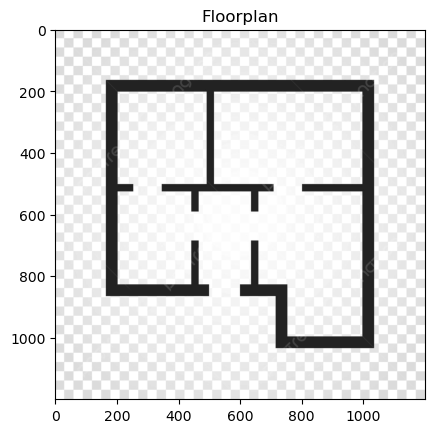

In [70]:
import cv2
import matplotlib.pyplot as plt

# Load the image
image_path = "/Users/amanchandel/Work/projects/MCV2/floorplans/floorplan1.png"  # Replace with your floorplan image path
image = cv2.imread(image_path)

# Convert to grayscale for processing
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Display the image

plt.imshow(gray_image, cmap="gray")
plt.title("Floorplan")
plt.show()


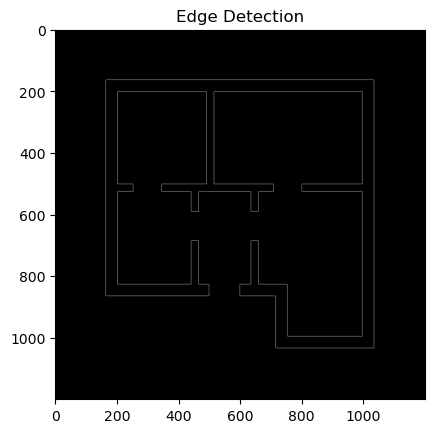

In [72]:
# Thresholding to create a binary image
_, binary_image = cv2.threshold(gray_image, 128, 255, cv2.THRESH_BINARY)

# Edge detection
edges = cv2.Canny(binary_image, threshold1=50, threshold2=150)

# Display the processed image
plt.imshow(edges, cmap="gray")
plt.title("Edge Detection")
plt.show()


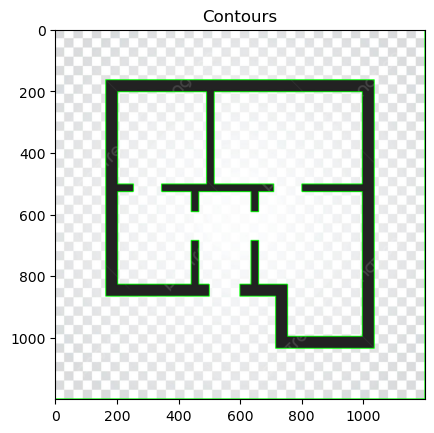

In [74]:
import numpy as np

# Detect contours
contours, _ = cv2.findContours(binary_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Draw contours on the original image
contour_image = image.copy()
cv2.drawContours(contour_image, contours, -1, (0, 255, 0), 2)

plt.imshow(cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB))
plt.title("Contours")
plt.show()



In [76]:
coordinates = []
for contour in contours:
    for point in contour:
        x, y = point[0]  # Extract x, y from the contour point
        coordinates.append((x, y))

# Normalize coordinates (optional: to fit a grid or scale)
max_x = max([coord[0] for coord in coordinates])
max_y = max([coord[1] for coord in coordinates])
scaled_coordinates = [(x / max_x, y / max_y) for x, y in coordinates]

print("Normalized Coordinates:")
print(scaled_coordinates)



Normalized Coordinates:
[(0.0, 0.0), (0.0, 1.0), (1.0, 1.0), (1.0, 0.0), (0.13678065054211844, 0.13761467889908258), (0.13761467889908258, 0.13678065054211844), (0.8623853211009175, 0.13678065054211844), (0.8632193494578816, 0.13761467889908258), (0.8632193494578816, 0.8623853211009175), (0.8623853211009175, 0.8632193494578816), (0.5971643035863219, 0.8632193494578816), (0.5963302752293578, 0.8623853211009175), (0.5963302752293578, 0.7222685571309424), (0.5004170141784821, 0.7222685571309424), (0.49958298582151794, 0.7214345287739783), (0.49958298582151794, 0.6905754795663053), (0.5004170141784821, 0.6897414512093412), (0.5296080066722268, 0.6897414512093412), (0.5296080066722268, 0.5721434528773979), (0.530442035029191, 0.5713094245204337), (0.5496246872393661, 0.5713094245204337), (0.5504587155963303, 0.5721434528773979), (0.5504587155963303, 0.6897414512093412), (0.6271893244370309, 0.6897414512093412), (0.6288573811509591, 0.6914095079232694), (0.6288573811509591, 0.830692243536280

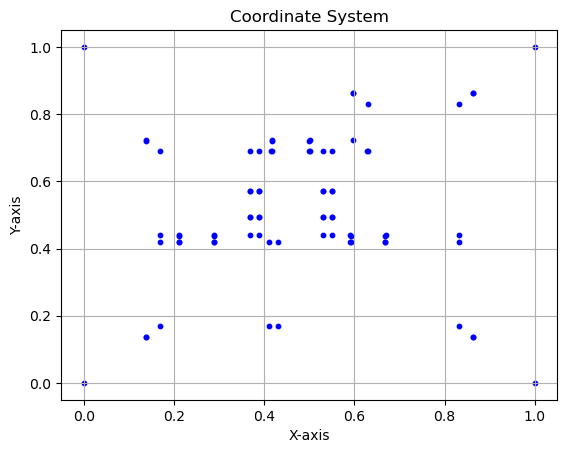

In [78]:
import matplotlib.pyplot as plt

# Plot the coordinates
x_coords, y_coords = zip(*scaled_coordinates)
plt.scatter(x_coords, y_coords, c='blue', s=10)
plt.title("Coordinate System")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.grid()
plt.show()



In [80]:
import csv

# Save to CSV
with open("coordinates.csv", "w", newline="") as file:
    writer = csv.writer(file)
    writer.writerow(["X", "Y"])
    writer.writerows(scaled_coordinates)

print("Coordinates saved to coordinates.csv")



Coordinates saved to coordinates.csv
